In [1]:
import sys

from IPython.core.pylabtools import figsize

sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from IPython.display import Audio
from src.data_loader import DataLoader
from src.pre_processing import PreProcessor
from config.config import Config

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
loader = DataLoader()
config = Config()

metadata = loader.load_metadata()
print(f"Total audio files: {len(metadata)}")
print(f"Number of classes: {metadata['classID'].nunique()}")
print(f"\nDataset shape: {metadata.shape}")
print(f"\nFirst few rows:")
metadata.head(n = 20)

Total audio files: 8732
Number of classes: 10

Dataset shape: (8732, 8)

First few rows:


slice_file_name    fsID      start        end  salience  fold  classID  \
0     100032-3-0-0.wav  100032   0.000000   0.317551         1     5        3   
1   100263-2-0-117.wav  100263  58.500000  62.500000         1     5        2   
2   100263-2-0-121.wav  100263  60.500000  64.500000         1     5        2   
3   100263-2-0-126.wav  100263  63.000000  67.000000         1     5        2   
4   100263-2-0-137.wav  100263  68.500000  72.500000         1     5        2   
5   100263-2-0-143.wav  100263  71.500000  75.500000         1     5        2   
6   100263-2-0-161.wav  100263  80.500000  84.500000         1     5        2   
7     100263-2-0-3.wav  100263   1.500000   5.500000         1     5        2   
8    100263-2-0-36.wav  100263  18.000000  22.000000         1     5        2   
9     100648-1-0-0.wav  100648   4.823402   5.471927         2    10        1   
10    100648-1-1-0.wav  100648   8.998279  10.052132         2    10        1   
11    100648-1-2-0.wav  100648  16.699509  17.104837         2    10        1   
12    100648-1-3-0.wav  100648  17.631764  19.253075         2    10        1   
13    100648-1-4-0.wav  100648  25.332994  27.197502         2    10        1   
14    100652-3-0-0.wav  100652   0.000000   4.000000         1     2        3   
15    100652-3-0-1.wav  100652   0.500000   4.500000         1     2        3   
16    100652-3-0-2.wav  100652   1.000000   5.000000         1     2        3   
17    100652-3-0-3.wav  100652   1.500000   5.500000         1     2        3   
18    100795-3-0-0.wav  100795   0.191790   4.191790         1    10        3   
19    100795-3-1-0.wav  100795  13.059155  17.059155         1    10        3   

               class  
0           dog_bark  
1   children_playing  
2   children_playing  
3   children_playing  
4   children_playing  
5   children_playing  
6   children_playing  
7   children_playing  
8   children_playing  
9           car_horn  
10          car_horn  
11          car_horn  
12          car_horn  
13          car_horn  
14          dog_bark  
15          dog_bark  
16          dog_bark  
17          dog_bark  
18          dog_bark  
19          dog_bark

In [3]:
print(metadata.dtypes)

slice_file_name     object
fsID                 int64
start              float64
end                float64
salience             int64
fold                 int64
classID              int64
class               object
dtype: object


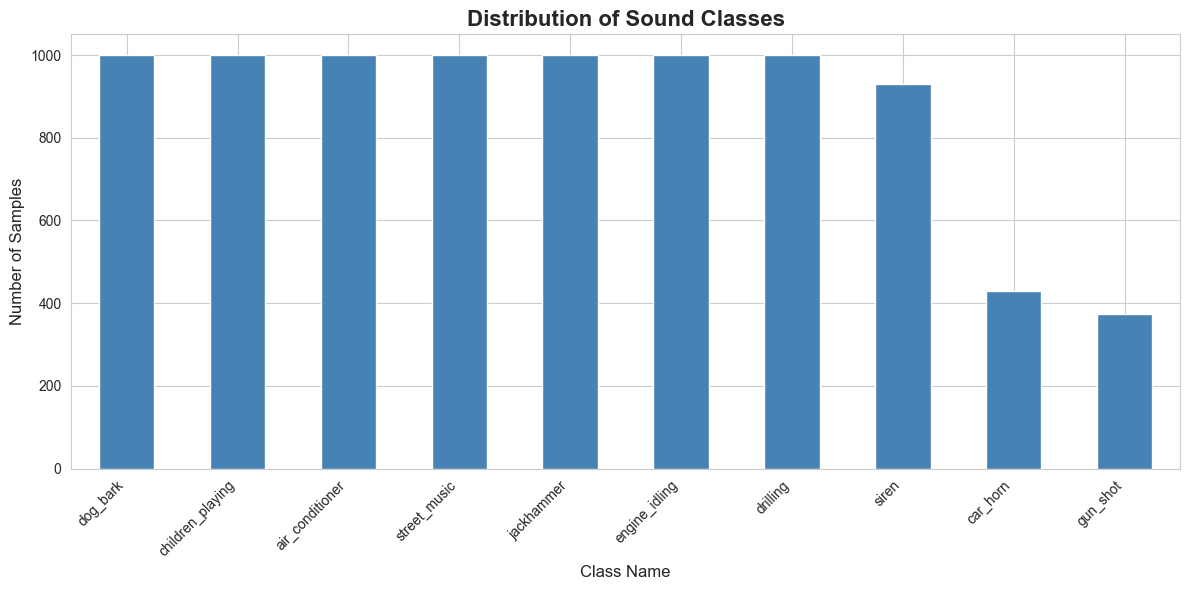


Class distribution:
class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64


In [4]:
class_counts = loader.get_class_distribution()

plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar', color='steelblue')
plt.title('Distribution of Sound Classes', fontsize=16, fontweight='bold')
plt.xlabel('Class Name', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nClass distribution:")
print(class_counts)

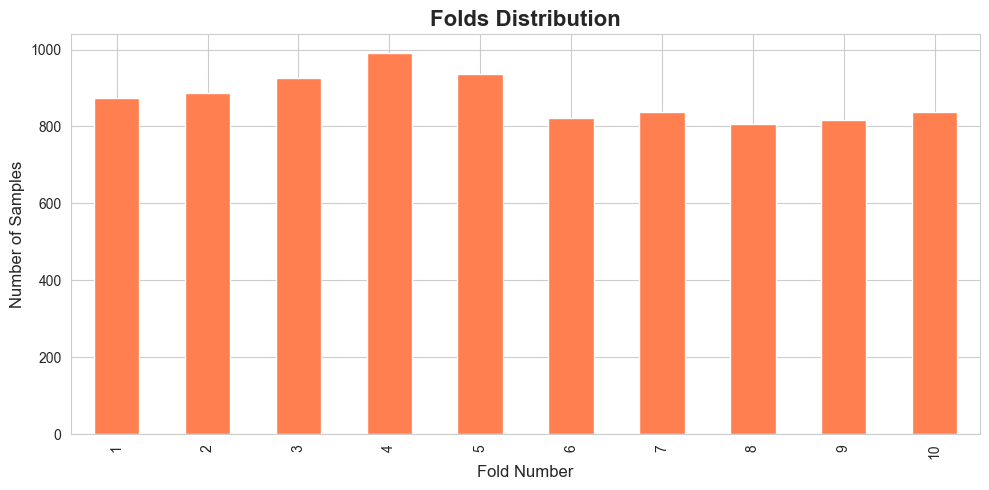

In [5]:
fold_distribution = metadata['fold'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
fold_distribution.plot(kind='bar', color='coral')
plt.title('Folds Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.tight_layout()
plt.show()

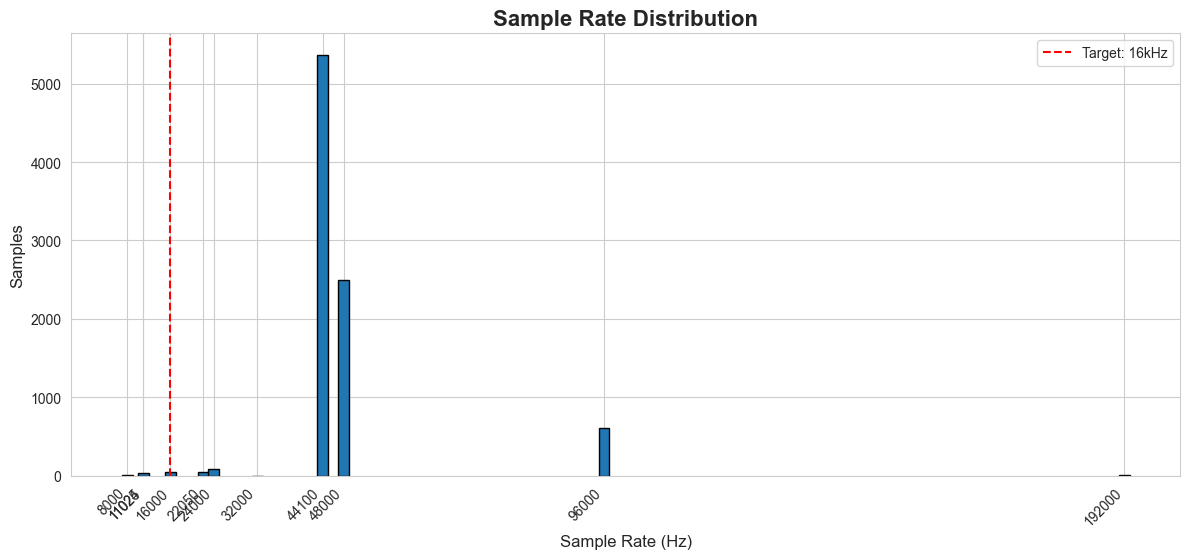

In [11]:
preprocessor = PreProcessor()
sample_rates = {}
for class_id in range(10):
    class_files = metadata[metadata['classID'] == class_id]
    rates = []

    for idx,row in class_files.iterrows():
        audio_path = loader.get_audio_path(row['slice_file_name'], row['fold'])
        sr = preprocessor.get_sample_rate(audio_path)
        rates.append(sr)

    sample_rates[config.CLASS_NAMES[class_id]] = rates

all_rates = [rate for rates in sample_rates.values() for rate in rates]
unique, counts = np.unique(all_rates, return_counts=True)

plt.figure(figsize=(12, 6))

plt.bar(unique, counts, width = 2000, edgecolor='black')
plt.axvline(16000, color='red', linestyle='--', label='Target: 16kHz')

plt.title('Sample Rate Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Sample Rate (Hz)', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.xticks(unique, rotation=45, ha='right')
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [12]:
for class_id in range(10):
    class_name = config.CLASS_NAMES[class_id]

    sample = metadata[metadata['classID'] == class_id].iloc[0]
    audio_path = loader.get_audio_path(sample['slice_file_name'], sample['fold'])

    audio, sr = librosa.load(audio_path, sr=None)

    print(f"{class_id}. {class_name}")
    print(f"   File: {sample['slice_file_name']}")
    print(f"   Duration: {len(audio)/sr:.2f}s, Sample Rate: {sr}Hz")
    display(Audio(audio, rate=sr))
    print()

0. air_conditioner
   File: 100852-0-0-0.wav
   Duration: 4.00s, Sample Rate: 44100Hz



1. car_horn
   File: 100648-1-0-0.wav
   Duration: 0.65s, Sample Rate: 44100Hz



2. children_playing
   File: 100263-2-0-117.wav
   Duration: 4.00s, Sample Rate: 44100Hz



3. dog_bark
   File: 100032-3-0-0.wav
   Duration: 0.32s, Sample Rate: 44100Hz



4. drilling
   File: 103199-4-0-0.wav
   Duration: 4.00s, Sample Rate: 44100Hz



5. engine_idling
   File: 102857-5-0-0.wav
   Duration: 4.00s, Sample Rate: 44100Hz



6. gun_shot
   File: 102305-6-0-0.wav
   Duration: 2.61s, Sample Rate: 44100Hz



7. jackhammer
   File: 103074-7-0-0.wav
   Duration: 4.00s, Sample Rate: 48000Hz



8. siren
   File: 102853-8-0-0.wav
   Duration: 4.00s, Sample Rate: 44100Hz



9. street_music
   File: 101848-9-0-0.wav
   Duration: 4.00s, Sample Rate: 44100Hz


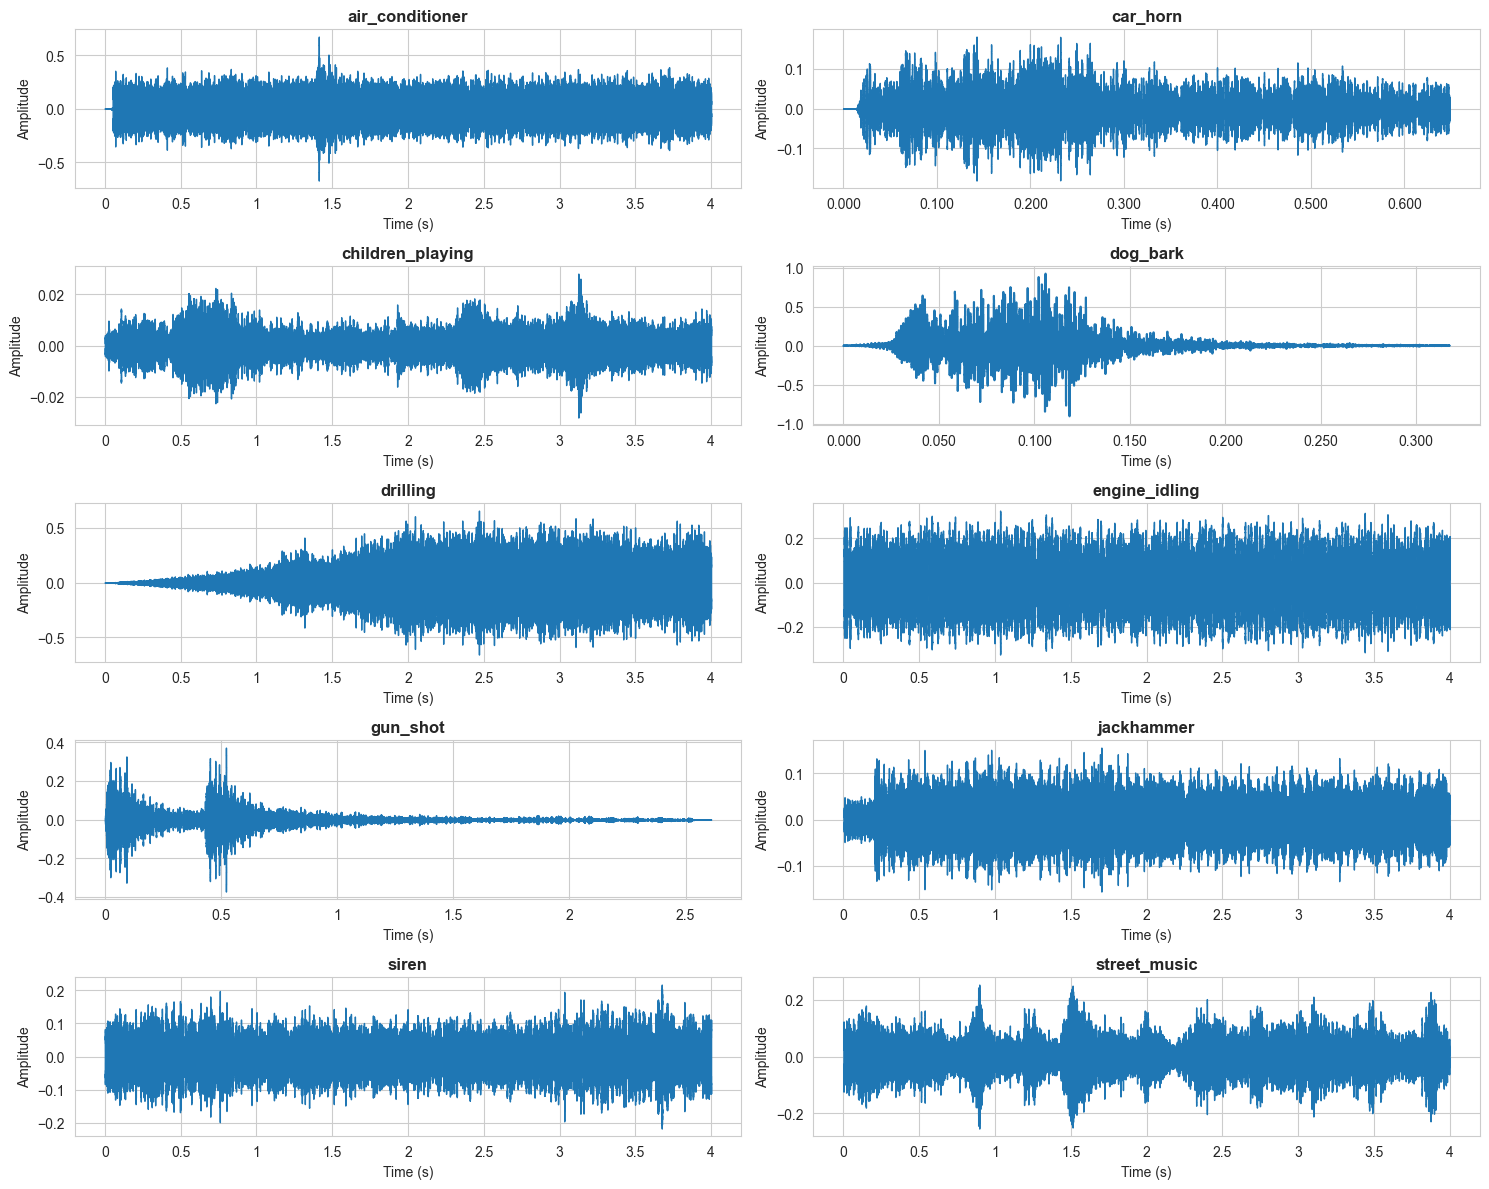

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()

for class_id in range(10):
    class_name = config.CLASS_NAMES[class_id]

    sample = metadata[metadata['classID'] == class_id].iloc[0]
    audio_path = loader.get_audio_path(sample['slice_file_name'], sample['fold'])

    audio,sr = librosa.load(audio_path, sr=config.TARGET_SR)

    ax = axes[class_id]
    librosa.display.waveshow(audio, sr=sr, ax=ax)
    ax.set_title(f"{class_name}", fontweight='bold')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

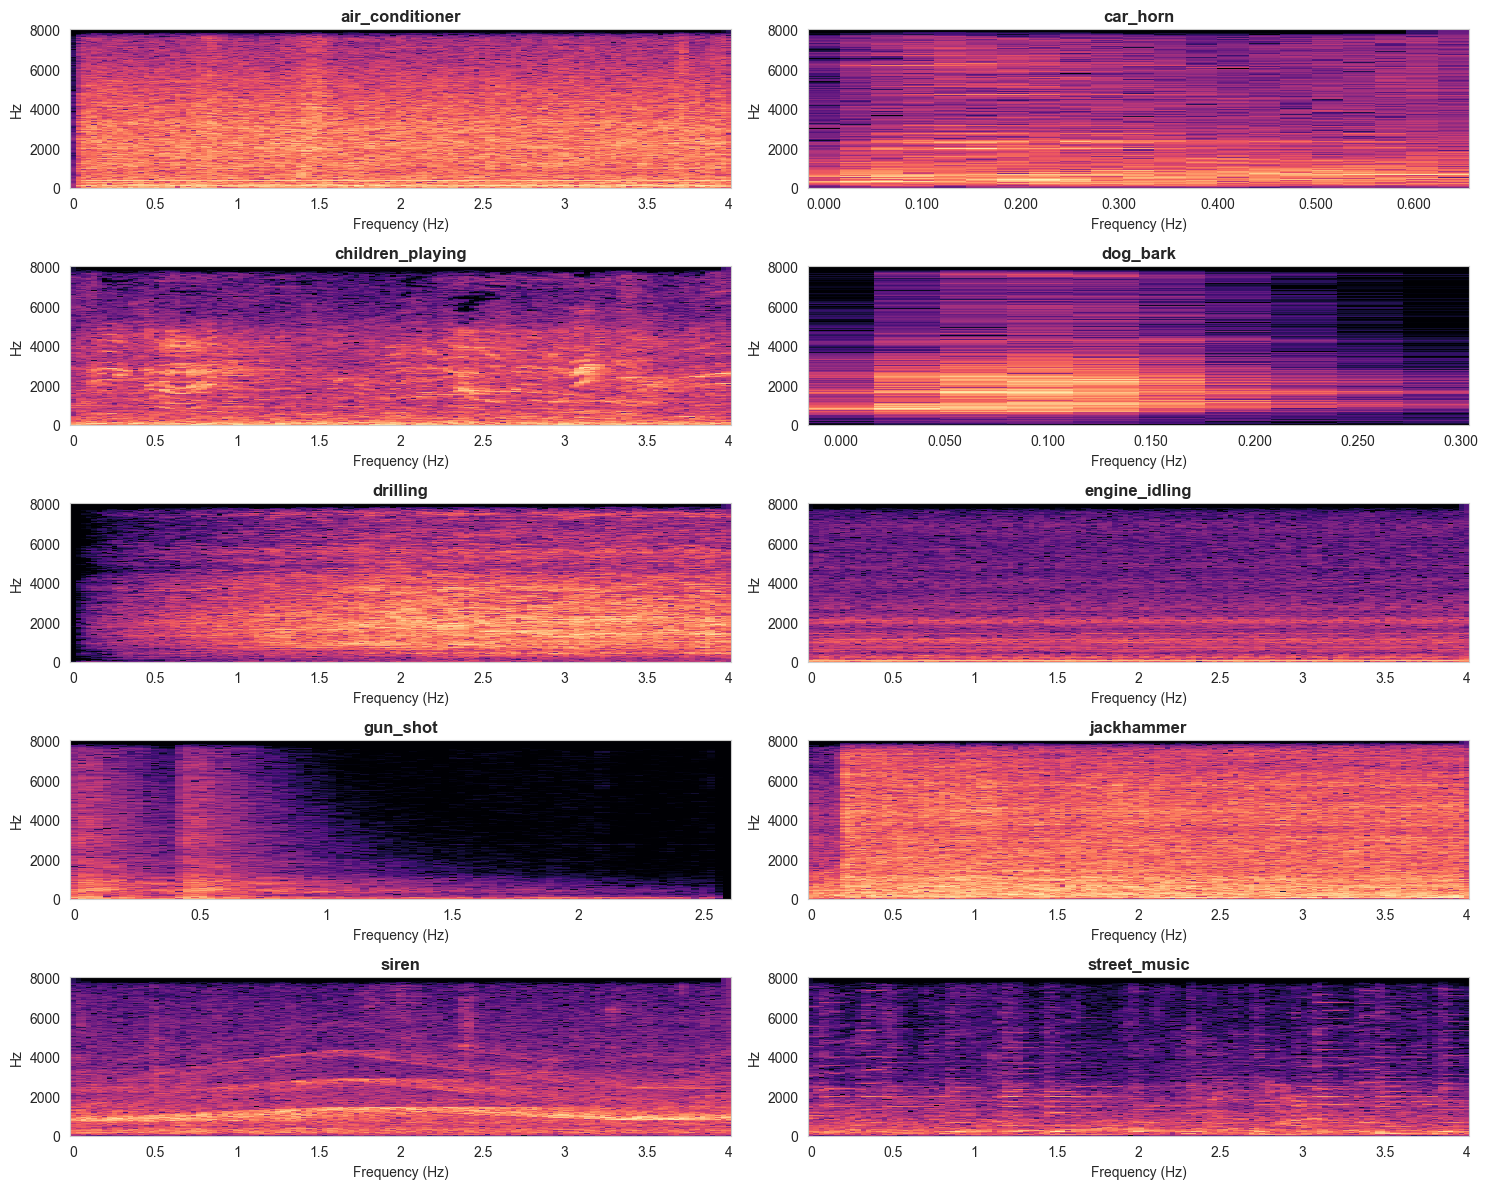

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
axes = axes.flatten()

for class_id in range(10):
    class_name = config.CLASS_NAMES[class_id]

    sample = metadata[metadata['classID'] == class_id].iloc[0]
    audio_path = loader.get_audio_path(sample['slice_file_name'], sample['fold'])

    audio,sr = librosa.load(audio_path, sr=config.TARGET_SR)

    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)

    ax = axes[class_id]
    img = librosa.display.specshow(D, sr=sr, ax=ax, x_axis='time', y_axis='hz')
    ax.set_title(f"{class_name}", fontweight='bold')
    ax.set_xlabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

In [16]:
print(f"Total Samples: {len(metadata)}")
for i, count in enumerate(class_counts):
    percentage = (count / len(metadata)) * 100
    print(f"  {config.CLASS_NAMES[i]:20s}: {count:4d} ({percentage:.1f}%)")

Total Samples: 8732
  air_conditioner     : 1000 (11.5%)
  car_horn            : 1000 (11.5%)
  children_playing    : 1000 (11.5%)
  dog_bark            : 1000 (11.5%)
  drilling            : 1000 (11.5%)
  engine_idling       : 1000 (11.5%)
  gun_shot            : 1000 (11.5%)
  jackhammer          :  929 (10.6%)
  siren               :  429 (4.9%)
  street_music        :  374 (4.3%)
